In [25]:
import sklearn as sk
import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt

In [26]:
# filename of the output file of promort_model_evaluation.py
fn = '../../python/models_evaluation/cosk_l1_test0/val_8_LSB_10/cosk_l1_bal_tcr_0.80_1.00.pckl_promort_vgg16_weights_ep_18_vacc_0.92.bin/pred.csv'

In [27]:
df = pd.read_csv(fn)

In [28]:
df

,patch_id,normal_p,tumor_p,normal_gt,tumor_gt
0,ce4d571a-3637-4738-bbb5-b7854eb78b89,1.00,0.00,1.0,0.0
1,692c5643-9c6a-4acc-bd6e-342961dde0d5,1.00,0.00,1.0,0.0
2,7fc069b7-03b5-4b5d-b988-e04e8884e90e,0.05,0.95,1.0,0.0
3,05a735d6-3ec4-424f-8d39-f5d8ca8261b2,1.00,0.00,1.0,0.0
4,3cd706ea-9e80-4cf8-bae0-f864418160ce,1.00,0.00,1.0,0.0
...,...,...,...,...,...
14531,0dfcf489-794e-4424-8695-9acc0081e520,0.72,0.28,0.0,1.0
14532,20180107-0dc1-4977-8883-1ee444f55b88,0.00,1.00,0.0,1.0
14533,fa442490-4e5f-4561-9bcc-a2a648d97145,0.33,0.67,0.0,1.0
14534,5a5202a9-a0ba-4534-a11d-fa03e9846b2b,0.25,0.75,0.0,1.0


In [29]:
true = df['tumor_gt']
score = df['tumor_p']

### ROC and AUC

In [30]:
fpr, tpr, th = roc_curve(true, score)
auc = roc_auc_score(true, score)

In [31]:
th

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 ,
       0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69,
       0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58,
       0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47,
       0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36,
       0.35, 0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25,
       0.24, 0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14,
       0.13, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03,
       0.02, 0.01, 0.  ])

In [32]:
auc

0.9590518380494377

### Best accuracy threshold

In [33]:
a_s_l = []
for t in th[1:]:
    pred = np.array(score.values)
    pred[pred >= t] = 1
    pred[pred < t] = 0
    a_s = accuracy_score(true, pred)
    a_s_l.append(a_s)

m_val = max(a_s_l)
th_m_val = th[np.argmax(a_s_l)+1]

In [34]:
th_m_val

0.26

### Precision-Recall curve

In [35]:
prec, rec, th_pr = precision_recall_curve(true, score)

th_m_val_index = np.where(th_pr == th_m_val)
print (prec[th_m_val_index], rec[th_m_val_index])

diff2 = np.power((prec[1:]-rec[1:]),2.0)
th_min_diff = th_pr[diff2.argmin()]
pr_rec_eq = rec[diff2.argmin()]

[0.91575508] [0.88690149]


### F1-score at max_accuracy threshold

In [36]:
pred = np.array(score.values)
pred[pred >= th_m_val] = 1
pred[pred < th_m_val] = 0
f1_score(true, pred)

0.9010973649262599

In [37]:
pred

array([0., 0., 1., ..., 1., 1., 1.])

### All diagrams on a single graph

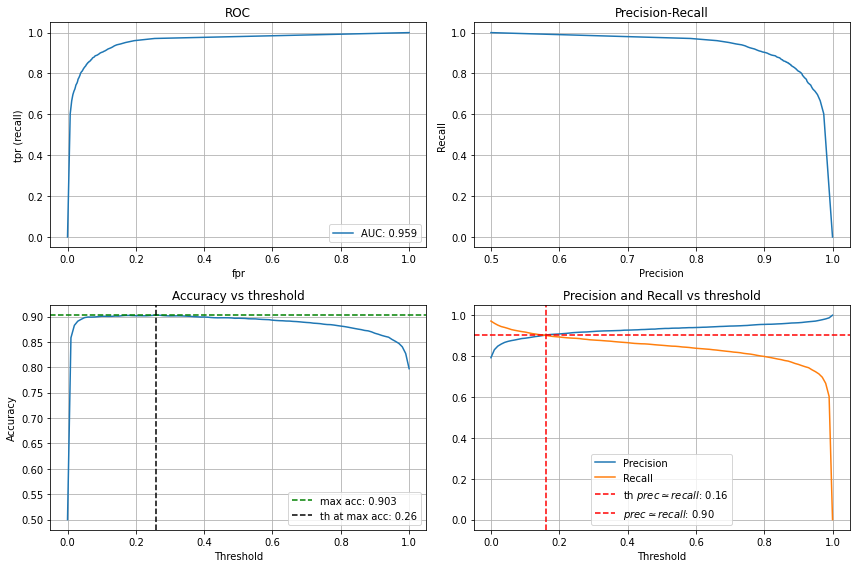

In [38]:
fig, axs = plt.subplots(2,2,figsize=(12,8))

fpr, tpr, th = roc_curve(true, score)
auc = roc_auc_score(true, score)

ax = axs[0,0]
ax.plot(fpr, tpr, label='AUC: %.3f' % auc)
ax.legend(loc='lower right')
ax.grid()
ax.set_xlabel('fpr')
ax.set_ylabel('tpr (recall)')
ax.set_title('ROC')

ax = axs[0,1]
ax.plot(prec, rec)
ax.grid()
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision-Recall')

ax = axs[1,0]
ax.plot(th[1:], a_s_l)
ax.axhline(m_val, label='max acc: %.3f' % m_val, c='g', ls = '--')
ax.axvline(th_m_val, label='th at max acc: %.2f' % th_m_val, c='k', ls='--')
#ax.axvline(th_min_diff, c='r', ls='--', label=r'th $prec \approx recall$: %.2f' % th_min_diff)
ax.legend()
ax.grid()
ax.set_title('Accuracy vs threshold')
ax.set_xlabel('Threshold')
ax.set_ylabel('Accuracy')

ax = axs[1,1]
ax.plot(th_pr[:], prec[1:], label='Precision')
ax.plot(th_pr[:], rec[1:], label='Recall')
ax.axvline(th_min_diff, c='r', ls='--', label=r'th $prec \simeq recall$: %.2f' % th_min_diff)
ax.axhline(pr_rec_eq, c='r', ls='--', label=r'$prec \simeq recall$: %.2f' % pr_rec_eq)
#ax.axvline(th_m_val, label='th at max acc: %.2f' % th_m_val, c='k', ls='--')
ax.grid()
ax.legend()
ax.set_xlabel('Threshold')
ax.set_title('Precision and Recall vs threshold')

plt.tight_layout()

In [39]:
for tmp_th in np.linspace(0.0,1.0,10):
    true_t = (df['tumor_gt'][df['tumor_gt'] == 1]).values
    score_t = (df['tumor_p'][df['tumor_gt'] == 1]).values
    pred_t = np.copy(score_t) 
    pred_t[pred_t > tmp_th] = 1
    pred_t[pred_t <= tmp_th] = 0

    true_n = df['tumor_gt'][df['tumor_gt'] == 0].values
    score_n = df['tumor_p'][df['tumor_gt'] == 0].values
    pred_n = np.copy(score_n) 
    pred_n[pred_n > tmp_th] = 1
    pred_n[pred_n <= tmp_th] = 0

    acc_t = accuracy_score(true_t, pred_t)
    acc_n = accuracy_score(true_n, pred_n)
    m = np.mean([acc_t, acc_n])
    print (f"th:{tmp_th:.2f} - Tumor acc: {acc_t:.4f}, Normal acc: {acc_n:.4f}, Mean acc: {m:.4f}")

th:0.00 - Tumor acc: 0.9714, Normal acc: 0.7450, Mean acc: 0.8582
th:0.11 - Tumor acc: 0.9140, Normal acc: 0.8869, Mean acc: 0.9005
th:0.22 - Tumor acc: 0.8901, Normal acc: 0.9130, Mean acc: 0.9016
th:0.33 - Tumor acc: 0.8752, Normal acc: 0.9271, Mean acc: 0.9011
th:0.44 - Tumor acc: 0.8602, Normal acc: 0.9351, Mean acc: 0.8976
th:0.56 - Tumor acc: 0.8467, Normal acc: 0.9429, Mean acc: 0.8948
th:0.67 - Tumor acc: 0.8295, Normal acc: 0.9507, Mean acc: 0.8901
th:0.78 - Tumor acc: 0.8067, Normal acc: 0.9598, Mean acc: 0.8833
th:0.89 - Tumor acc: 0.7702, Normal acc: 0.9695, Mean acc: 0.8698
th:1.00 - Tumor acc: 0.0000, Normal acc: 1.0000, Mean acc: 0.5000
